# 机器学习的工作流程

我们在**拿到一个机器学习问题之后，要做的第一件事就是制作出我们的机器学习项目清单**。下面给出了一个可供参考的机器学习项目清单，它应该适用于大多数机器学习项目，虽然确切的实现细节可能有所不同，但机器学习项目的一般结构保持相对稳定：

1. 数据清理和格式化

2. 探索性数据分析

3. 特征工程和特征选择

4. 基于性能指标比较几种机器学习模型

5. 对最佳模型执行超参数调整

6. 在测试集上评估最佳模型

7. 解释模型结果

8. 得出结论


提前设置机器学习管道结构让我们看到每一步是如何流入另一步的。但是，机器学习管道是一个迭代过程，因此我们并不总是以线性方式遵循这些步骤。我们可能会根据管道下游的结果重新审视上一步。例如，
* 虽然我们可以在构建任何模型之前执行特征选择，但我们可以使用建模结果返回并选择一组不同的特征。 
* 或者，建模可能会出现意想不到的结果，这意味着我们希望从另一个角度探索我们的数据。 
* 一般来说，你必须完成一步才能继续下一步，但不要觉得一旦你第一次完成一步，你就不能回头做出改进！你可以在任何时候返回前面的步骤并作出相应的修改

# 导入库

使用标准的数据科学和机器学习库：`numpy，pandas`和`scikit-learn`。 使用`matplotlib`和`seaborn`进行可视化。

In [ ]:
#用于数据操作的 Pandas和numpy
import pandas as pd
import numpy as np

In [ ]:
# 不显示关于在切片副本上设置值的警告
pd.options.mode.chained_assignment = None

# 一个 dataframe 最多显示60例
pd.set_option('display.max_columns', 60)
import warnings
warnings.filterwarnings("ignore")
#不显示警告

### 项目来源：

**这是2018年夏天，一位美国数据科学家在申请工作时的“作业”，完整的英文版作业可以在[这里](https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/hw_assignment.pdf)看到**

### 项目目标：

* **使用提供的建筑能源数据开发一个模型，该模型可以预测建筑物的能源之星得分**，
* **然后解释结果以找到最能预测得分的变量。**

### 项目介绍：

这是一个**监督学习的回归机器学习任务**：给定一组包含目标（在本例中为分数）的数据，我们希望训练一个可以学习将特征（也称为解释变量）映射到目标的模型。

* **监督学习问题**： 我们可以知道数据的特征和目标，我们的目标是训练可以学习两者之间映射关系的模型。
* **回归问题**： Energy Star Score是一个连续变量。

在训练中，我们希望模型能够学习特征和分数之间的关系，因此我们给出了特征和答案。然后，为了测试模型的学习效果，我们在一个从未见过答案的测试集上进行评估

In [ ]:
# 可视化工具包
import matplotlib.pyplot as plt
%matplotlib inline

#设置默认字体大小
plt.rcParams['font.size'] = 24

# 导入设置图片大小的工具
from IPython.core.pylabtools import figsize

#导入用于可视化的Seaborn
import seaborn as sns
sns.set(font_scale = 2)

In [ ]:
# 把数据分为训练集和测试集

from sklearn.model_selection import train_test_split

# 1. 数据清理和格式化

## 1.1 加载并检查数据



我们将把数据加载到pandas数据帧中，这是数据科学最有用的数据结构之一。将其视为Python中的电子表格，我们可以轻松地操作，清理和可视化。[Pandas有许多方法](http://pandas.pydata.org/pandas-docs/stable/)可以帮助使数据科学/机器学习管道尽可能顺利。

In [ ]:
# 把数据读入pandas dataframe
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_2016.csv')

In [ ]:
# 显示前五行
data.head()

加载数据后，我们要解决的**第一个问题：理解数据**。

我们通常会看到每一列的第一行是各种名词，就是所谓的表头，理解这些名词的含义对于处理数据非常重要，但是我们面对的数据来自各个领域，数据科学家不是精通各个领域专业知识的杂家，这时候就需要通过各种手段去理解数据：

1. 查看数据文件的文件名，寻找线索，在本例中，数据文件名是：
`Energy_and_Water_Data_Disclosure_for_Local_2016.csv`
根据数据可以获得两个资料： 
  * [this webpage](http://www.nyc.gov/html/gbee/html/plan/ll84.shtml) 
  * [this pdf document](http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf)

第二个文件对于数据中的每一个名词给出了详细的定义。这是一个非常好的开始，也是在提醒你要放慢速度，这样你才不会错过任何重要的东西！

2. 直接搜索每一列第一行出现的名词，我们不需要研究所有的列的定义，但我们至少应该了解Energy Star Score，它被描述为：
**根据报告年度中，自我报告的能源使用情况而进行的1至100百分位的排名。 Energy Star Score是用于比较建筑物能效的相对度量。**

**第二个问题：缺少的值被编码为“Not Available”**。

这是Python中的一个字符串，这意味着甚至包含数字的列都将被存储为object数据类型，因为Pandas会将包含任何字符串的列转换为所有元素都为字符串的列。我们可以使用`dataframe.info()`方法来**查看列的数据类型**：


## 1.2  数据类型和缺失值

`dataframe.info`方法是一种通过显示每列的**数据类型**和**非缺失值的数量**来评估数据的快速方法。从查看数据帧开始，可能存在问题，因为缺失值被编码为`Not Available`而不是`np.nan`（不是数字）。这意味着带有数字的列将不会表示为数字，因为**pandas会将具有任何字符串值的列转换为所有字符串的列**。

In [ ]:
data.info()

一些明确包含数字（例如$ft²$）的列被存储为object类型（对象类型）。 我们不能对字符串进行数值分析，因此必须将其转换为数字（特别是浮点数）数据类型！

### 1.2.1 将数据转换为正确的类型


* 我们首先**将带有数字并且缺失值被编码为`Not Available`的列转换为数字数据类型**，方法是将`Not Available`项替换为可以解释为浮点数的`np.nan`。 
* 然后我们将包含数值（例如平方英尺或能量使用）的列转换为数字数据类型:

In [ ]:
#将“Not Available”项替换为可以解释为浮点数的np.nan
data = data.replace({'Not Available': np.nan})

# 一些明确包含数字（例如ft²）的列被存储为object类型。 我们不能对字符串进行数值分析，因此必须将其转换为数字（特别是浮点数）数据类型
# 对列数进行迭代
for col in list(data.columns):
    # 选择需要被数字化的列，通过if 判断实现
    # 凡是包含下列红色字体的列，都需要被转化为数据类型
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col
            or 'kWh' in col or 'therms' in col or 'gal' in col
            or 'Score' in col):
        # 将数据类型转换为float
        data[col] = data[col].astype(float)

In [ ]:
# 每列的统计信息
data.describe()

`data.describe(percentiles=None, include=None, exclude=None)`作用是生成描述性统计数据，总结数据集分布的集中趋势，分散和形状，不包括 NaN值。参数含义：
* percentiles：包括在输出中的百分位数。全部应该介于0和1之间。默认值为 ，返回第25，第50和第75百分位数。[.25, .5, .75]
* include：默认是None 结果将包括所有数字列
* exclude：默认是None,结果将不包含任何内容。

对于数字数据，则结果将包括count， mean，std，min，max以及第25，第50和第75百分位数,其中第50百分位数等价于中位数，更多信息[查看这里](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)


In [ ]:
# 显示前五行
data.head()

## 1.3 处理缺失值

现在我们有了正确的列数据类型，我们可以通过**查看每列中缺失值的百分比来开始分析**。 当我们进行探索性数据分析时，缺失的值很好，但是必须使用机器学习方法进行填写。

以下是一个函数，**用于计算缺失值的数量以及每列缺少的总值的百分比**。 与数据科学中的许多任务一样，我自己没有编写这个函数，而是在在线论坛[Stack Overflow forum](https://stackoverflow.com/a/39734251) 中发现它的！

In [ ]:
# 按列计算缺失值的函数
def missing_values_table(df):
    #计算总的缺失值
    mis_val = df.isnull().sum()

    #计算缺失值的百分比
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    #把结果制成表格
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    #对列重命名，第一列：Missing Values，第二列：% of Total Values
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })

    #根据百分比对表格进行降序排列
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)

    #打印总结信息：总的列数，有数据缺失的列数
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # 返回带有缺失值信息的dataframe
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(data)

这个数据集里一共有11746个实例，即11746栋建筑。通过上面的结果，我们可以看到我们的目标**能源之星得分**有2104个缺失值，占比17.9%，正常值有9642个，等一下我们会用到这个数据

处理真实世界数据时的另一个常见问题是缺失值。 这可能是由于许多原因引起的，在我们训练机器学习模型之前必须填写或删除这些缺失值。
* 首先，让我们了解每列中有多少缺失值。如果列中缺失值的比例很高，那么它对我们的模型可能不会有用。

删除列的阈值应该取决于实际问题，对于此项目，我们将删除缺失值超过50％的列。

In [ ]:
# 获取缺失值超过50％的列
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

In [ ]:
# 删除缺失值超过50％的列
data = data.drop(list(missing_columns), axis = 1)

在进行机器学习之前，必须使用适当的策略估算其余的缺失值（填写）。

# 2. 探索性数据分析

[探索性数据分析（EDA）](https://en.wikipedia.org/wiki/Exploratory_data_analysis)是一个开放式流程，我们制作绘图并计算统计数据，以便探索我们的数据。 

* 目的是找到异常，模式，趋势或关系。 这些可能是有趣的（例如，找到两个变量之间的相关性），或者它们可用于建模决策，例如使用哪些特征。 
* 简而言之，EDA的目标是确定我们的数据可以告诉我们什么！ EDA通常以高级概述(high-level overview)开始，然后在我们找到要检查的感兴趣的区域时缩小到数据集的特定部分。

要开始EDA，我们将专注于单一变量，**the Energy Star Score**，因为这是我们的机器学习模型的目标。 为简单起见，我们可以将该列重命名为`score`，然后开始探索此值。

## 2.1 单变量图

单个变量（称为[单变量]（https://en.wikipedia.org/wiki/Univariate_（统计））图表显示单个变量的分布，例如直方图。

目标是预测**Energy Star Score**（将其重新命名为`score`），因此合理的开始是**检查此变量的分布**。直方图是可视化单个变量分布的简单而有效的方法，使用matplotlib可以很容易的画出直方图。

In [ ]:
figsize(8,8)

# 将Energy Star Score重新命名为score
data = data.rename(columns = {'ENERGY STAR Score':'score'})

# 绘制直方图

plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(),bins = 100,edgecolor = 'k')
# x,y 坐标轴标签
plt.xlabel('Score');
plt.ylabel('Number of Buildings')
#图表名称
plt.title('Energy Star Score Distribution');

由于能源之星得分是百分位数，我们预计会看到完全平坦的分布，每个得分占分布的1％（大约是90个建筑物）。 然而，事实并非如此，因为我们可以看到两个最常见的分数1和100构成总分数的不相称的数字。换句话说就是在两端出现了异常值

我们回到分数的定义，我们会看到它是基于自我报告的能源使用情况。这造成了一个问题，因为建筑物所有者可能想要报告较低的用电量以人为地提高他们的建筑物的分数。这就像要求学生在测试中报告自己的分数。这种行为可以解释有很高比例的建筑物得到满分100，但不能解释为什么有这么多建筑物的得分在最底层！

为了对比能源之星得分，我们可以看一下**能源使用强度（EUI）**，它是**总能源使用量除以建筑物的面积（平方英尺）**。这个能源使用量不是自我报告的，因此这可以更客观地衡量建筑物的能源效率。此外，这不是百分位数，因此绝对值很重要，我们希望它们近似正态分布，可能在低端或高端有一些异常值。




In [ ]:
# 绘制能源使用强度（EUI）直方图

figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); 
plt.title('Site EUI Distribution');

这个结果惊不惊喜，意不意外？这表明我们遇到了**另一个问题：异常值**！ 由于存在一些分数非常高的建筑物，因此图表非常倾斜。 看起来我们将不得不稍微绕道来处理这些异常值。 我们来看看**EUI**这个特征的统计数据

In [ ]:
data['Site EUI (kBtu/ft²)'].describe()# 这是data.describe() 第二次出现

In [ ]:
# 取出前十名

data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

其中一栋建筑的得分远远高于其他建筑。让我们定位能源使用强度（`Site EUI`）最高的建筑，查看详情


In [ ]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

异常值可能由于多种原因而发生：

* 打字错误
* 测量设备故障
* 不正确的单位
* 或者它们可能是合法的但是极端值。

异常值可以抛弃，因为它们并不表示数据的实际分布。

## 2.2 去除异常值

当我们删除异常值时，我们需要小心，我们不会因为它们看起来很奇怪就丢掉测量值。它们可能是我们应该进一步研究的实际现象的结果。 当删除异常值时，我尝试使用[极端异常值](https://people.richland.edu/james/lecture/m170/ch03-pos.html)的定义尽可能保守：

* 在低端，极端异常值低于 $\text{First Quartile} -3 * \text{Interquartile Range}$
* 在高端，极端异常值高于 $\text{Third Quartile} + 3 * \text{Interquartile Range}$

在这种情况下，我将只删除单个外围点并查看分布的形状。

In [ ]:
# 计算第一和第三 四分数
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# 第四分位数范围
iqr = third_quartile - first_quartile

# 去除异常值

data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr))
            & (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

In [ ]:
# # 绘制能源使用强度（EUI）直方图

figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); 
plt.title('Site EUI Distribution');

这幅图看起来好多了，并且接近正常分布，右侧有一条长尾（它有一个正偏斜）。

虽然`Site EUI`可能是一个更客观的衡量标准，但我们的目标仍然是预测能源之星得分，因此我们将回过头来研究这个变量。 即使分数不是一个好的衡量标准，我们仍然需要预测它，这就是我们将要做的事情！ 在回到公司的最终报告中，我将指出这可能不是一个客观的衡量标准，并且使用不同的指标来确定建筑物的效率是个好主意。 此外，如果我们有更多时间参与这个项目，那么看看分数为1和100的建筑物可能会很有趣，看看它们是否有任何共同之处。

## 2.3 寻找关系

为了查看**分类变量 - categorical variables**对分数的影响，我们可以通过**分类变量**的值来绘制**密度图**。 密度图还显示单个变量的分布，可以认为是平滑的直方图。 如果我们通过为**分类变量**密度曲线着色，这将向我们展示分布如何基于类别变化的。

我们将制作的第一个图表显示了**分类变量**的分数分布。 为了不使图形混乱，我们将图形限制为在数据集中具有超过100个观测值的建筑类型。

"具有超过100个观测值的建筑类型" 这句话是什么意思呢？ 有的建筑是住宅楼，有的是酒店，有的是写字楼办公楼，有的是医院等等。

如果用作住宅楼的建筑和用作办公楼的建筑都超过100栋了，那我们就把这两种类型的建筑物的得分分布画出来。例如下图中的红色曲线就代表`Office`这个类型的建筑物的能源之星得分分布

In [ ]:
# 创建一个建筑物列表，对建筑物类型及其数量进行统计
types = data.dropna(subset=['score'])
Alltypes_num = types['Largest Property Use Type'].value_counts()

**查看所有的建筑物类型及其数量**

In [ ]:
print(Alltypes_num)

通过上面的结果可以看到，观测值超过100个的建筑物类型有四种：
 * 'Multifamily Housing', 
 * 'Office', 
 * 'Hotel', 
 * 'Non-Refrigerated Warehouse'

把观测值超过100个的建筑物通过`>`运算符提取出来，你可以自由更改`>`后面的数字，来查看其他建筑物类型的得分分布图。

下面的代码取得90，因为通过刚才的结果可以发现："K-12 School"  "Residence Hall/Dormitory" 这两项非常接近100，所以有必要加进去一起看看，反正也不会损失什么，对吧

In [ ]:
types = list(Alltypes_num[Alltypes_num.values > 90].index)

In [ ]:
print(types)

In [ ]:
# 建筑类别分数分布图
figsize(12, 10)

# 绘制每个建筑物
for b_type in types:
    # 选择建筑类型
    subset = data[data['Largest Property Use Type'] == b_type]

    # 能源之星得分的密度图
    sns.kdeplot(subset['score'].dropna(), label=b_type, shade=False, alpha=0.8)

plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.legend()
plt.title('Density Plot of Energy Star Scores by Building Type', size=28)

* 我们可以看到**建筑类型**对`Energy Star Score`有重大影响。 办公楼往往有较高的分数，而酒店的分数较低。这告诉我们，我们应该在建模中包含建筑类型，因为它确实对目标有影响。 **作为分类变量，我们将不得不对建筑物类型进行one-hot编码**。

* 同时，也提醒我们，还有其他特征可能会影响最终的得分，比如建筑物所在的位置，数据集中给出了每一栋建筑的经纬度坐标，这是一个值得考虑的选项，不过这需要当地的地图，可以参考[这个例子](https://github.com/DeqianBai/Hands-on-Machine-Learning/blob/master/02_Housing.ipynb)

但我们暂时先不考虑坐标特征, 我们检查另一个分类变量，**自治市镇 - borough**，我们可以制作相同的图表，但这次是由borough着色。

你可以看到，代码和刚才的基本一样：

In [ ]:
boroughs = data.dropna(subset=['score'])
Allboroughs_num = boroughs['Borough'].value_counts()

In [ ]:
print(Allboroughs_num)

In [ ]:
boroughs = list(Allboroughs_num[Allboroughs_num.values > 100].index)

In [ ]:
print(boroughs)

In [ ]:
figsize(12,10)

for borough in boroughs:
    subset = data[data['Borough']==borough]
    sns.kdeplot(subset['score'].dropna(),label = borough);
    
plt.xlabel('Energy Star Score', size = 20); 
plt.ylabel('Density', size = 20); 
plt.legend()
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

建筑物所在的自治市镇似乎没有像建筑类型那样在分数分布上产生显着差异。尽管如此，将自治市镇纳入分类变量可能是有意义的。

## 2.4 特征与目标之间的相关性

为了量化**特征**（变量）和**目标**之间的相关性，我们可以计算[Pearson相关系数](http://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/)。 这是两个变量之间线性关系的强度和方向的度量：

* **- 1** 表示两个变量完全负线性相关，
* **+1** 表示两个变量完全正线性相关。 

下图显示了相关系数的不同值以及它们如何以图形方式显示。

尽管
* **特征**和**目标**之间可能存在非线性关系，
* 相关系数不考虑**特征之间**的相互作用，

但**线性关系**是开始探索数据趋势的好方法。 然后，我们可以使用这些值来选择要在我们的模型中使用的特征。



![image.png](images/af1b2f3830bdf4bb81de2f6d4fac8301_1240.png)

下面的代码计算所有变量和分数之间的相关系数。

In [ ]:
# 找到所有相关性并排序
correlations_data = data.corr()['score'].sort_values()

# 打印最负相关性
print(correlations_data.head(15),'\n')

# 打印最正相关性
print(correlations_data.tail(15))


特征和目标之间存在几个强烈的负相关。与得分最负相关的是三个不同类别：
* 能源使用强度 - Energy Use Intensity（EUI），
* 场地EUI - Site EUI（kBtu /ft²）
* 天气归一化场地EUI - Weather Normalized Site EUI （kBtu /ft²）（这些在计算方式上略有不同）。 

EUI是建筑物使用的能量除以建筑物的平方英尺，用于衡量建筑物的效率，得分越低越好。直观地说，这些相关性是有意义的：**随着EUI的增加，能源之星得分趋于下降**。

为了考虑可能的非线性关系，我们可以采用**特征的平方根和自然对数变换**，然后用得分计算相关系数。为了尝试捕捉自治市镇或建筑类型和得分之间任何可能的关系（记住这些是**分类变量**），我们将对这些列进行one-hot编码。

在下面的代码中，
* 我们采用数值变量的**对数和平方根变换**，
* 对两个选定的分类变量（建筑类型和自治市镇）进行one-hot编码，
* 计算所有特征与得分之间的相关性，
* 并显示前15个最正和前15个最负相关。

这很多，但有了pandas，每一步都很简单！

In [ ]:
# 选择数字列
numeric_subset = data.select_dtypes('number')

In [ ]:
numeric_subset

In [ ]:
# 选择数字列
numeric_subset = data.select_dtypes('number')

# 使用数字列的平方根和对数创建列
for col in numeric_subset.columns:
     # 跳过the Energy Star Score 这一列
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_ '+ col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# 选择分类列        
categorical_subset = data[['Borough','Largest Property Use Type']]

# ne hot 编码
categorical_subset = pd.get_dummies(categorical_subset)

# 使用concat对两个数据帧进行拼接，确保使用axis = 1来执行列绑定
features = pd.concat([numeric_subset,categorical_subset],axis =1)

# 放弃没有能源之星评分的建筑物
features = features.dropna(subset = ['score'])

# 找到与得分之间的相关性
correlations = features.corr()['score'].dropna().sort_values()

In [ ]:
# 显示最负相关的关系
correlations.head(15)

In [ ]:
# 显示最正相关的关系
correlations.tail(15)

转换特征后，

* 最强的关系仍然是与能源使用强度（EUI）相关的关系。
* 对数和平方根变换似乎没有导致任何更强的关系。
* 虽然我们确实看到建筑类型为办公室（`Largest Property Use Type_Office`）建筑与分数略微正相关，但没有强烈的正线性关系。此变量是建筑类型的分类变量的单热编码表示。

我们可以使用这些相关性来执行特征选择（马上就会讲到）。

现在，让我们绘制数据集中最重要的相关性（就绝对值而言），即`Site EUI（kBtu/ft^2）`。我们可以按照建筑类型为图表着色，以显示它如何影响关系。

## 2.5 双变量图（Two-Variable Plots）

为了可视化两个变量之间的关系，我们使用散点图。我们还可以使用诸如标记的颜色或标记的大小等方面包括其他变量。在这里，我们将相互绘制两个数字变量，并使用颜色表示第三个分类变量。

In [ ]:
figsize(12, 10)

# 提取建筑类型
features['Largest Property Use Type'] = data.dropna(
    subset=['score'])['Largest Property Use Type']

# 限制超过100个观测值的建筑类型（来自之前的代码）
features = features[features['Largest Property Use Type'].isin(types)]

# 使用seaborn绘制Score与 Log Source EUI 的散点图
sns.lmplot('Site EUI (kBtu/ft²)',
           'score',
           hue='Largest Property Use Type',
           data=features,
           scatter_kws={
               'alpha': 0.8,
               's': 60
           },
           fit_reg=False,
           size=12,
           aspect=1.2)

plt.xlabel("Site EUI", size=28)
plt.ylabel('Energy Star Score', size=28)
plt.title('Energy Star Score vs Site EUI', size=36)

Site EUI与得分之间存在明显的负相关关系。这种关系不是完全线性的,它的相关系数为 - 0.7，但看起来这个特征对于预测建筑物的得分非常重要。

### 2.5.1 Pairs Plot

作为探索性数据分析的最后一个练习，我们可以在几个不同的变量之间建立**Pairs Plot**。 Pairs Plot是一次检查多个变量的好方法，因为它显示了对角线上的变量对和单个变量直方图之间的散点图。

使用seaborn `PairGrid`函数，我们可以将不同的图绘制到网格的三个方面:

* 上三角显示散点图
* 对角线将显示直方图
* 下三角形将显示两个变量之间的相关系数和两个变量的2-D核密度估计。

In [ ]:
# 提取要绘制的列
plot_data = features[[
    'score', 'Site EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
    'log_Total GHG Emissions (Metric Tons CO2e)'
]]

# 把 inf 换成 nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# 重命名
plot_data = plot_data.rename(
    columns={
        'Site EUI (kBtu/ft²)': 'Site EUI',
        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'
    })

# 删除 na 值
plot_data = plot_data.dropna()


# 计算某两列之间的相关系数
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8),
                xycoords=ax.transAxes,
                size=20)


# 创建 pairgrid 对象
grid = sns.PairGrid(data=plot_data, size=3)

# 上三角是散点图
grid.map_upper(plt.scatter, color='red', alpha=0.6)

# 对角线是直方图
grid.map_diag(plt.hist, color='red', edgecolor='black')

# 下三角是相关系数和二维核密度图
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap=plt.cm.Reds)

plt.suptitle('Pairs Plot of Energy Data', size=36, y=1.02)

为了解释图中的关系，我们可以查找一行中的变量与一列中的变量相交的位置。例如，

* 要查找score与log of GHG Emissions之间的关系，我们会查看score列和 log of GHG Emissions行。在交叉点（左下图），我们看到得分与该变量的相关系数为-0.35。如果我们查看右上图，我们可以看到这种关系的散点图。

* 要查看Weather EUorm EUI与score的相关性，我们查看Weather EUorm EUI行和score列，可以看到相关系数为-0.67。

# 3. 特征工程和选择

现在我们已经探索了数据中的趋势和关系，我们可以为我们的模型设计一组函数。 我们可以使用EDA的结果来构建特征工程。 特别是，我们从EDA学到了以下知识，可以帮助我们进行特征工程/选择：

* 分数分布因建筑类型而异，并且在较小程度上因行政区而异。 虽然我们将关注数字特征，但我们还应该在模型中包含这两个分类特征。
* 对特征进行对数变换不会导致特征与分数之间的线性相关性显着增加


在我们进一步讨论之前，我们应该定义什么是特征工程和选择！ 这些定义是非正式的，并且有很多重叠，但我喜欢将它们视为两个独立的过程：

* __[Feature Engineering](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)__:  获取原始数据并提取或创建新特征的过程。这可能意味着需要对变量进行变换，例如自然对数和平方根，或者对分类变量进行one-hot编码，以便它们可以在模型中使用。 一般来说，我认为特征工程是从原始数据创建附加特征。

* __[Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)__:  选择数据中最相关的特征的过程。在特征选择中，我们删除特征以帮助模型更好地总结新数据并创建更具可解释性的模型。一般来说，特征选择是减去特征，所以我们只留下那些最重要的特征。[most variance](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). 


在特征选择中，我们删除了无助于我们的模型学习特征与目标之间关系的特征。 这可以帮助模型更好地概括新数据并产生更可解释的模型。 一般来说，我认为特征选择为**__subtracting__特征**，因此我们只留下最重要的特征。

特征工程和选择是迭代过程，通常需要多次尝试才能正确。 通常我们会使用建模结果（例如来自随机森林的特征重要性）返回并重做特征选择，或者我们稍后可能会发现需要创建新变量的关系。 此外，这些过程通常包含领域知识和数据统计质量的混合。

[Feature engineering and selection](https://www.featurelabs.com/blog/secret-to-data-science-success/) 通常具有在机器学习问题上投入的最高回报。 要做到正确可能需要一段时间，但通常比用于模型的精确算法和超参数更重要。 如果我们不为模型提供正确的数据，那么我们将其设置为失败，我们不应期望它能够学习！

在此项目中，我们将采用以下步骤进行特征工程：

* 仅选择数值变量和两个分类变量（自治市和使用属性）
* 在数值变量的对数转换中添加
* One-hot编码分类变量

对于特征选择，我们将执行以下操作：

* 删除[共线特征](https://statinfer.com/204-1-9-issue-of-multicollinearity-in-python/)

当我们进入那个过程时，我们将讨论共线性（也称为多重共线性-[multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)）！

## 3.1 特征工程

以下代码
* 选择数字特征，
* 添加所有数字特征的对数转换，
* 选择分类特征并进行one-hot encodes ，
* 最后将这些特征组合在一起。

In [ ]:
# 复制原始数据
features = data.copy()

# 选择数字列
numeric_subset  = data.select_dtypes('number')

# 使用数字列的对数创建新列
for col in numeric_subset.columns:
    # 跳过the Energy Star Score 这一列
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# 选择分类列
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# 使用concat对两个数据帧进行拼接，确保使用axis = 1来执行列绑定
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

也就是说，我们有11319个建筑物，具有109个不同的特征（一列是得分）。 并非所有这些特征对于预测得分都很重要，其中一些特征也是多余的，因为它们具有高度相关性。 我们将在下面讨论第二个问题。

## 3.2 特征选择（去除共线特征）

高共线特征 - [collinear features](http://psychologicalstatistics.blogspot.com/2013/11/multicollinearity-and-collinearity-in.html)在它们之间具有显着的相关系数。例如，在我们的数据集中，Site EUI和Weather Norm EUI高度相关，因为它们只是略微不同的计算能源使用强度的方法。

In [ ]:
plot_data = data[[
    'Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)'
]].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'],
         plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')

plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(
    data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)'
          ]].dropna(),
    rowvar=False)[0][1])

虽然数据集中的变量通常与较小程度相关，但高度共线变量可能是多余的，因为我们只需保留其中一个特征即可为模型提供必要的信息。

* 删除共线特征是一种通过减少特征数量来降低模型复杂性的方法，可以帮助增加模型泛化。

* 它还可以帮助我们解释模型，因为我们只需要担心单个变量，例如EUI，而不是EUI和weather normalized EUI如何影响分数。

有许多方法可以消除共线特征，例如使用**方差膨胀因子** - [Variance Inflation Factor](http://www.statisticshowto.com/variance-inflation-factor/)。

* 我们将使用更简单的度量标准，
* 并删除相关系数高于某个阈值的特征（不是得分，因为我们想要与得分高度相关的变量！）

有关删除共线变量的更全面的讨论，请在Kaggle上查看此[笔记本](https://www.kaggle.com/robertoruiz/dealing-with-multicollinearity/code).。

以下代码
* 通过删除所比较的两个特征之一，根据我们为相关系数选择的阈值来移除共线特征。
* 它还打印其删除的相关性，以便我们可以看到调整阈值的效果。

我们将使用0.6的阈值，如果特征之间的相关系数超过该值，则删除一对特征中的一个。

同样，我实际上并没有从头开始编写这段代码，而是改编自[Stack Overflow answer]（https://stackoverflow.com/a/43104383）

In [ ]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
       删除数据帧中相关系数大于阈值的共线特征。 删除共线特征可以帮助模型泛化并提高模型的可解释性。
        
    Inputs: 
        阈值：删除任何相关性大于此值的特征
    
    Output: 
        仅包含非高共线特征的数据帧
    '''
    
    # 不要删除能源之星得分之间的相关性
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # 计算相关性矩阵
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # 迭代相关性矩阵并比较相关性
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # 如果相关性超过阈值
            if val >= threshold:
                # 打印有相关性的特征和相关值
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # 删除每对相关列中的一个
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # 将得分添加回数据
    x['score'] = y
               
    return x

In [ ]:
# 删除大于指定相关系数的共线特征
features = remove_collinear_features(features, 0.6);

In [ ]:
# 删除所有 na 值的列
features  = features.dropna(axis=1, how = 'all')
features.shape

我们的最终数据集现在有64个特征（其中一列是目标）。 这仍然是相当多的，但主要是因为我们有一个one-hot编码的分类变量。 此外，
* 虽然诸如线性回归之类的模型可能存在大量特征，
* 但诸如随机森林之类的模型执行隐式特征选择并自动确定在训练期间哪些特征是重要的。 

还有其他特征选择步骤，但是现在我们将保留我们拥有的所有特征并查看模型的执行方式。

#### 其他特征选择方法

有更多的[特征选择](http://scikit-learn.org/stable/modules/feature_selection.html)方法。一些流行的方法包括主成分分析（[PCA](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)），它将特征转换为保持最大方差的减少数量的维度，或独立成分分析（[ICA](http://cs229.stanford.edu/notes/cs229-notes11.pdf)），旨在找到一组特征中的独立源。

然而，虽然这些方法在减少特征数量方面是有效的，但它们创造了没有物理意义的新特征，因此几乎不可能解释模型。

这些方法对于处理高维数据非常有用，如果你打算处理机器学习问题，我建议你阅读更多有关[该主题](https://machinelearningmastery.com/feature-selection-machine-learning-python/)的内容！

## 3.3 划分训练集和测试集

对于我们的问题，我们将
* 首先提取所有没有能源之星得分的建筑物（我们不知道这些建筑物的真实答案，因此它们对训练或测试没有帮助）。 
* 然后，我们将使用能源之星分数将建筑物数据集拆分为30％的测试集，以及70％的训练集。

这是训练数据不是那么多的时候的一种选择，如果数据是百万级的甚至更高，这个比例还可以再调整。使用scikit-learn将数据拆分为随机训练和测试集很简单。 我们可以设置拆分的 `random state`以确保一致的结果。

In [ ]:
# 提取没有得分的建筑物和带有得分的建筑物
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

In [ ]:
# 将特征和目标分离开
features = score.drop(columns = 'score')
targets = pd.DataFrame(score['score'])

# 用 nan 替换 inf and -inf （required for later imputation）
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# 按照 7：3 的比例划分训练集和测试集

X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

我们有1858座没有得分的建筑，6622座建筑物在训练集中得分，2839座建筑物在测试组中得分。

接下来为我们的模型确定一个简单的基线！

## 3.4 建立Baseline

在我们开始制作机器学习模型之前建立一个基线是很重要的。 
* 如果我们构建的模型不能胜过基线，那么我们可能不得不承认机器学习不适合这个问题。 这可能是
   * 因为我们没有使用正确的模型，
   * 因为我们需要更多的数据，
   * 或者因为有一个更简单的解决方案不需要机器学习。 
   
建立基线至关重要，因此我们最终可能不会构建机器学习模型，只是意识到我们无法真正解决问题。

对于回归任务，一个好的基线是为测试集上的所有实例预测目标在训练集上的中值。 这很容易实现，并为我们的模型设置了相对较低的标准：如果它们不能比猜测中值更好，那么我们需要重新考虑我们的方法。

#### 度量标准：平均绝对误差 - Mean Absolute Error（MAE）

机器学习任务中使用了许多指标，很难知道[选择哪一个](https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/)。大多数情况下，它将取决于特定问题，如果你有一个特定的目标需要优化。

[Andrew Ng](https://www.coursera.org/learn/machine-learning-projects/lecture/wIKkC/single-number-evaluation-metric)建议使用单个实值性能指标来比较模型，因为它简化了评估过程。我们应该使用一个数字，而不是计算多个指标并尝试确定每个指标的重要程度。

 * 在这种情况下，因为我们进行回归，所以[平均绝对误差](https://people.duke.edu/~rnau/compare.htm)是适当的度量。

* 这也是可以解释的，因为它代表我们估算的平均数量，如果与目标值单位相同。

下面的函数计算真实值和预测之间的平均绝对误差。

In [ ]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

现在我们可以进行中位数猜测并在测试集上进行评估。

In [ ]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

这表明我们对测试集的平均估计偏差约25个百分点。因为得分在1到100之间，这意味着来自基线方法的平均误差约为25％。猜测训练中值的 naive 方法为我们的模型提供了一个低基线！

### 小结

到目前为止，我们完成了

1. 清理并格式化原始数据
2. 进行探索性数据分析以了解数据集
3. 开发了一系列我们将用于模型的特征

最后，我们还完成了建立我们可以判断我们的机器学习算法的Baseline的关键步骤。希望你开始了解机器学习管道的每个部分是如何流入下一个管道的： 
* 清理数据并将其转换为正确的格式允许我们执行探索性数据分析。 
* 然后，EDA在特征工程和选择阶段影响我们的决策。

这三个步骤通常按此顺序执行，但我们可能会稍后再回来，根据我们的建模结果进行更多的EDA或特征工程。 数据科学是一个迭代过程，我们一直在寻找改进以前工作的方法。

如果需要保存已经处理好的数据集可以用下面的代码：
* `X` 保存为 `training_features.csv`
* `X_test`保存为 `testing_features.csv`
* `y` 保存为 `training_labels.csv`
* `y_test` 保存为`testing_labels.csv`

In [ ]:
# Save the no scores, training, and testing data
no_score.to_csv('data/no_score.csv', index = False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)

导入一些我们需要的包

In [ ]:
# 输入缺失值和缩放值
from sklearn.preprocessing import  MinMaxScaler
from sklearn.impute import SimpleImputer
# 机器学习模型
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# 超参数调整
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

读取格式化后的数据。

In [ ]:
# Read in data into dataframes 
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

**注意**;这是格式化数据的样子。 在前3个步骤中，我们通过获取变量的自然对数来设计多个特征，包括两个分类变量，并通过删除高共线特征来选择特征的子集。


In [ ]:
train_features.head(12)

In [ ]:
train_features.describe()

The score 列包含能源之星分数，这是我们机器学习问题的目标。 能源之星评分应该是对建筑物能效的一种比较测量，尽管我们看到第一部分的计算方法可能存在问题！

这是能源之星得分的分布。

In [ ]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['score'].dropna(), bins = 100);
plt.xlabel('Score'); 
plt.ylabel('Number of Buildings'); 
plt.title('ENERGY Star Score Distribution');

# 4. 基于性能指标比较几种机器学习模型


在本节中，我们将为我们的监督回归任务构建，训练和评估几种机器学习方法。 目标是确定哪个模型最有希望进一步开发（例如超参数调整）。 我们使用平均绝对误差比较模型。 猜测得分中值的基线模型平均偏离25分。

## 4.1 输入缺失值

标准机器学习模型无法处理缺失值，这意味着我们必须找到一种方法来填充这些缺失值或丢弃任何具有缺失值的特征。 由于我们已经删除了第一部分中缺失值超过50％的特征，因此我们将重点关注这些缺失值，即称为插补 ([imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)))的过程。 有许多插补方法，但在这里我们将使用相对简单的方法用列的**中位数**替换缺失值。([Here is a more thorough discussion on imputing missing values](http://www.stat.columbia.edu/~gelman/arm/missing.pdf))

在下面的代码中，我们**创建一个Scikit-learn Imputer对象，用列的中位数填充缺失值**。 请注意，

* 我们在**训练数据**上训练了imputer（使用Imputer.fit方法），但没有训练**测试数据**。 

* 然后我们转换（使用Imputer.transform）训练数据和测试数据。 这意味着**测试集**中的缺失值用**训练集**中相应列的中值填充。 [我们必须现在这样做](https://stackoverflow.com/a/46692001)而不是在部署时，是因为我们必须根据以前的训练数据将缺失值归入新观察中。 这是避免称为[数据泄漏](https://www.kaggle.com/dansbecker/data-leakage)问题的一种方法，其中来自测试集的信息“泄漏”到训练过程中。

In [ ]:
# 使用中位数填充策略创建一个imputer对象
imputer = SimpleImputer(strategy = 'median')

# Train on the training features
imputer.fit(train_features)

# 转换训练数据和测试数据
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [ ]:
print('Missing values in training features:', np.sum(np.isnan(X)))
print('Missing values in testing features:',np.sum(np.isnan(X_test)))

In [ ]:
# Make sure all values are finite
# 确保所有值都是有限的

print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

在插补后，所有特征都是实值的。 对于更复杂的插补方法（尽管中值通常很有效），请查看 [this article](https://www.tandfonline.com/doi/full/10.1080/1743727X.2014.979146)



## 4.2 特征缩放

在我们构建模型之前要采取的最后一步是[特征缩放](https://en.wikipedia.org/wiki/Feature_scaling)。这是很有必要的，因为特征具有不同的单位，我们希望对特征进行标准化，以使单位不影响算法。
* [线性回归和随机森林不需要特征缩放](https://stats.stackexchange.com/questions/121886/when-should-i-apply-feature-scaling-for-my-data)
* 但其他方法（例如支持向量机和k-最近邻）确实需要它，因为它们考虑了观测之间的欧氏距离。因此，在比较多个算法时，最佳做法是特征缩放。

有两种[特征缩放](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)的方法：

* 对于每个值，减去特征的平均值并除以特征的标准偏差。这称为标准化，并且导致每个特征具有0的均值和1的标准偏差。
* 对于每个值，减去特征的最小值并除以最大值减去特征的最小值（范围）。这可以确保特征的所有值都在0到1之间，这称为缩放到范围或标准化。

这是一篇关于[normalization and standardization](https://machinelearningmastery.com/normalize-standardize-machine-learning-data-weka/).的好文章。与插补一样，
* 当我们训练缩放对象时，我们只想使用训练集。
* 当我们转换特征时，我们将转换训练集和测试集。

In [ ]:
# Create the scaler object with a range of 0-1 - 创建范围为0-1的缩放器对象
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# 转换训练数据和测试数据
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [ ]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

## 4.3 - 需要评估的模型

我们将使用[Scikit-Learn library](http://scikit-learn.org/stable/)比较五种不同的机器学习模型 ：

* [线性回归](https://github.com/DeqianBai/Hands-on-Machine-Learning/blob/master/02_Housing.ipynb)
* [支持向量机回归](https://github.com/DeqianBai/Hands-on-Machine-Learning/blob/master/05_Support%20Vector%20Machines.ipynb)
* [随机森林回归](https://github.com/DeqianBai/Hands-on-Machine-Learning/blob/master/07_Ensemble%20Learning%20and%20Random%20Forests.ipynb)
* [Gradient Boosting 回归](https://github.com/DeqianBai/Hands-on-Machine-Learning/blob/master/07_Ensemble%20Learning%20and%20Random%20Forests.ipynb)
* [K-Nearest Neighbors回归]

除了最后一个，上面四个都给出了很好的学习材料，是Hands-On Machine Learning的中文学习笔记。除了Hands-On Machine Learning之外，另一个用于机器学习模型学习的优秀资源是 [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/).

为了比较模型，我们将主要使用Scikit-Learn默认的模型超参数值。 通常这些将表现得很好，但应该在实际使用模型之前进行优化。

* 首先，我们只想确定每个模型的baseline性能，
* 然后我们可以选择性能最佳的模型，以便使用超参数调整进行进一步优化。请记住，默认的超参数将启动并运行模型，但几乎总是应该使用某种搜索来调整以找到问题的最佳设置！ 

Here is what the Scikit-learn documentation [says about the defaults](https://arxiv.org/abs/1309.0238):

    __Sensible defaults__: Whenever an operation requires a user-defined parameter,
    an appropriate default value is defined by the library. The default value
    should cause the operation to be performed in a sensible way (giving a baseline
    solution for the task at hand.)

关于scikit-learn的最好的一点是**所有模型都以相同的方式实现**：一旦你知道如何构建一个模型，你就可以实现**一系列**极其多样化的模型。 在这里，我们将在几行代码中实现许多模型的整个训练和测试程序。

In [ ]:
# 用于计算平均绝对误差的函数
def mae (y_true,y_pred):
    return np.mean(abs(y_true - y_pred))

# 接受模型，训练模型，并在测试集上评估模型

def fit_and_evaluate(model):
    
    # 训练模型
    model.fit(X,y)
    
    # 做出预测和评估
    model_pred = model.predict(X_test)
    model_mae = mae(y_test,model_pred)
    
    # 返回性能指标
    return model_mae

In [ ]:
# 线性回归
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f'% lr_mae)

In [ ]:
# 支持向量机
svm = SVR(C=1000,gamma =0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

In [ ]:
# 随机森林
random_forest = RandomForestRegressor(random_state = 60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

In [ ]:
# Gradient Boosting Regression
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

In [ ]:
# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

In [ ]:
plt.style.use('fivethirtyeight')
figsize(8, 4)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model':['Linear Regression',
                                          'Support Vector Machine',
                                          'Random Forest',
                                          'Gradient Boosted',
                                          'K-Nearest Neighbors'],
                                'mae':[lr_mae,
                                       svm_mae,
                                       random_forest_mae, 
                                       gradient_boosted_mae, 
                                       knn_mae]})
# 测试集上 mae的水平条形图
model_comparison.sort_values('mae',ascending = False).plot(x = 'model',
                                                           y = 'mae',
                                                           kind = 'barh',
                                                           color = 'red', 
                                                           edgecolor = 'black')
# 绘图格式
plt.ylabel('');
plt.yticks(size = 14);

plt.xlabel('Mean Absolute Error');
plt.xticks(size = 14)

plt.title('Model Comparison on Test MAE', size = 20);

* 根据运行情况（每次精确结果略有变化），梯度增强回归表现最佳，其次是随机森林。 
* 我们不得不承认这不是最公平的比较，因为我们主要使用默认的超参数。 特别是对于支持向量回归器，超参数对性能有重要影响。 （随机森林和梯度增强方法非常适合开始，因为性能较少依赖于模型设置）。 
* 尽管如此，从这些结果中，我们可以得出结论:**机器学习是适用的**，因为所有模型都明显**优于基线**！

从这里开始，我们将专注于使用超参数调优来优化最佳模型。 鉴于此处的结果，我们将专注于使用**GradientBoostingRegressor**。 

* 这是Gradient Boosted Trees的Scikit-Learn实现[Gradient Boosted Trees](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf)，在过去的几年中赢得了许多Kaggle比赛[Kaggle competitions](http://matthewemery.ca/Why-Kagglers-Love-XGBoost/) 。 
* Scikit-Learn版本通常比XGBoost版本慢，但在这里我们将坚持使用Scikit-Learn，因为语法更为熟悉。 [这是](https://www.kaggle.com/dansbecker/learning-to-use-xgboost/code) 在XGBoost包中使用实现的指南。

# 5. 对最佳模型执行超参数调整，即优化模型

在机器学习中，优化模型意味着为特定问题找到最佳的超参数集。

## 5.1 超参数


模型超参数定义[model hyperparameters are in contrast to model parameters](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/) :

* **模型超参数**被认为最好通过机器学习算法来进行设置，在训练之前由数据科学家调整。 例如，随机森林中的树木数量，或者K-Nearest Neighbors Regression中使用的邻居数量。

* **模型参数**是模型在训练期间学习的内容，例如线性回归中的权重。

我们作为数据科学家通过**选择超参数**来控制模型，这些选择会对模型的最终性能产生显着影响（尽管通常不会像获取更多数据或工程特征那样有效）。调整模型超参数 [Tuning the model hyperparameters](http://scikit-learn.org/stable/modules/grid_search.html) 可以控制模型中欠拟合与过拟合的平衡。 

* 我们可以尝试通过制作**更复杂的模型**来校正欠拟合，例如在随机森林中使用更多树或在深度神经网络中使用更多层。 当我们的模型没有足够的容量（自由度）来学习特征和目标之间的关系时，模型会发生**欠拟合并且具有高偏差**。 
* 我们可以通过**限制模型的复杂度和应用正则化**来尝试纠正过度拟合。 这可能意味着降低多项式回归的次数，或将衰退层添加到深度神经网络。 **过拟合的模型具有高方差**并且实际上记住了训练集。 

**欠拟合和过拟合导致模型在测试集上的泛化性能变差**。

选择超参数的问题在于，没有放之四海而皆准的超参数。 因此，对于每个新数据集，我们必须找到最佳设置。 这可能是一个耗时的过程，但幸运的是，在Scikit-Learn中执行此过程有多种选择。更好的是，新的libraries，如epistasis实验室的[TPOT](https://epistasislab.github.io/tpot/) 旨在为你自动完成此过程！ 目前，我们将坚持在Scikit-Learn中手动（有点）这样做，但请继续关注自动模型选择的文章！

#### [常见设置超参数的做法有](https://www.jianshu.com/p/1b23afa34a47)：

1. **猜测和检查**：根据经验或直觉，选择参数，一直迭代。
2. **网格搜索**：让计算机尝试在一定范围内均匀分布的一组值。
3. **随机搜索**：让计算机随机挑选一组值。
4. **贝叶斯优化**：使用贝叶斯优化超参数，会遇到贝叶斯优化算法本身就需要很多的参数的困难。
5. **在良好初始猜测的前提下进行局部优化**：这就是 MITIE 的方法，它使用 BOBYQA 算法，并有一个精心选择的起始点。由于 BOBYQA 只寻找最近的局部最优解，所以这个方法是否成功很大程度上取决于是否有一个好的起点。在 MITIE 的情下,我们知道一个好的起点，但这不是一个普遍的解决方案，因为通常你不会知道好的起点在哪里。从好的方面来说，这种方法非常适合寻找局部最优解。稍后我会再讨论这一点。
6. 最新提出的 **LIPO 的全局优化方法**。这个方法没有参数，而且经验证比随机搜索方法好。

下面使用随机搜索和交叉验证进行超参数调整

## 5.2 使用随机搜索和交叉验证进行超参数调整

**随机搜索**是指我们选择超参数来评估的方法：

* 我们定义一系列选项，然后随机选择要尝试的组合。 
* 这与网格搜索形成对比，网格搜索评估我们指定的每个组合。

通常，当我们对最佳模型超参数的知识有限时，随机搜索会更好，我们可以使用随机搜索缩小选项范围，然后使用更有限的选项范围进行网格搜索。

**交叉验证**是用于评估超参数性能的方法：我们使用K-Fold交叉验证，而不是将训练设置拆分为单独的训练和验证集，以减少我们可以使用的训练数据量。

* 这意味着将训练数据划分为K个折叠，然后进行迭代过程，我们首先在K-1个折叠上进行训练，然后评估第K个折叠的性能。
   * 我们重复这个过程K次，所以最终我们将测试训练数据中的每个例子，关键是每次迭代我们都在测试我们之前没有训练过的数据。

* 在K-Fold交叉验证结束时，我们将每个K次迭代的平均误差作为最终性能度量，然后立即在所有训练数据上训练模型。

* 我们记录的性能用于比较超参数的不同组合。

A picture of k-fold cross validation using k = 5 is shown below:

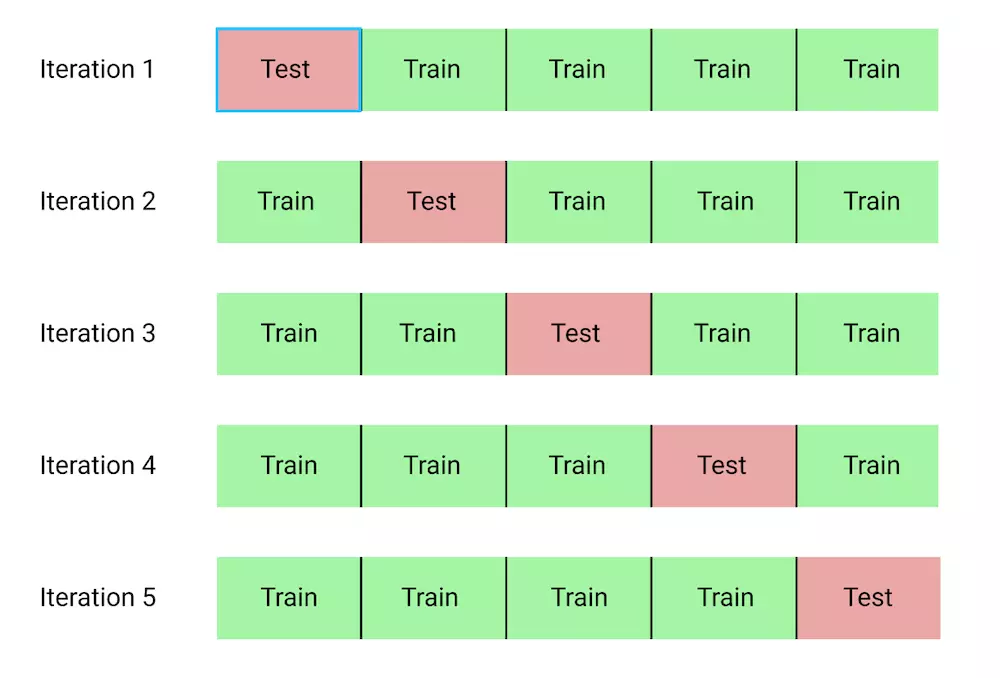

在这里，我们将使用**交叉验证实现随机搜索**，以选择梯度增强回归量的最佳超参数。我们首先定义一个网格，然后执行以下迭代过程：

* 从网格中随机抽样一组超参数，使用4倍交叉验证评估超参数，
* 然后选择具有最佳性能的超参数。

当然，我们实际上并没有自己做这个迭代，我们让Scikit-Learn和`RandomizedSearchCV`为我们完成这个过程！

In [ ]:
# 要优化的损失函数
loss = ['ls','lad','huber']

# 梯度增强过程中使用的树的数量
n_estimators = [100,500, 900, 1100,1500]

#  树的最大深度
max_depth = [2,3,5,10,15]

# 每片叶子的最小样本数
min_samples_leaf = [1,2,4,6,8]

# 拆分节点的最小样本数
min_samples_split = [2, 4, 6, 10]

# 进行拆分时要考虑的最大特征数
max_features = ['auto', 'sqrt', 'log2', None]

# 定义要进行搜索的超参数网格
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}  

我们选择了6个不同的超参数来调整梯度增强回归量。 这些都将以不同的方式影响模型，这些方法很难提前确定，找到特定问题的最佳组合的唯一方法是测试它们！ 要了解超参数，可以查看[Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)文档

在下面的代码中，我们创建了随机搜索对象，传递以下参数：

* `estimator`: 模型
* `param_distributions`: 我们定义的参数的分布
* `cv` ：用于k-fold交叉验证的folds 数量
* `n_iter`: 不同的参数组合的数量
* `scoring`: 评估候选参数时使用的指标
* `n_jobs`: 核的数量（-1 时全部使用）
* `verbose`: 显示信息的数量
* `return_train_score`: 每一个cross-validation fold 返回的分数
* `random_state`: 修复使用的随机数生成器，因此每次运行都会得到相同的结果

随机搜索对象的训练方式与任何其他scikit-learn模型相同。训练之后，我们可以比较所有不同的超参数组合，找到效果最好的组合。

In [ ]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [ ]:
# Fit on the training data
random_cv.fit(X, y)

Scikit-learn使用负平均绝对误差进行评估，因为它希望度量最大化。因此，更好的分数将接近0。

我们可以将随机搜索的结果导入数据帧，并按性能对值进行排序。

In [ ]:
# 获取所有cv结果并按测试性能排序
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

In [ ]:
random_cv.best_estimator_

最佳梯度增强模型具有以下超参数：

* `loss = lad`
* `n_estimators = 500`
* `max_depth = 5`
* `min_samples_leaf = 6`
* `min_samples_split = 6`
* `max_features = None` (This means that `max_features = n_features` according to the docs)

使用随机搜索是缩小可能的超参数以尝试的好方法。最初，我们不知道哪种组合效果最好，但这至少缩小了选项的范围。我们可以通过使用随机搜索结果来创建具有超参数的网格来进行网格搜索，这些参数接近于在随机搜索期间最佳的参数。

但是，我们不会再次评估所有这些设置，而是将**重点放在**单个树林中的树的数量（n_estimators）上。通过仅改变一个超参数，我们可以直接观察它如何影响性能。我们预计会看到树木数量对欠拟合和过拟合的影响。在这里，

* 我们将使用**仅具有n_estimators超参数的网格进行网格搜索**。
* 我们将评估一系列的树，然后绘制训练和测试性能，以了解增加树的数量对模型的影响。
* 我们将其他超参数固定为从随机搜索返回的最佳值，以隔离树的数量影响。

In [ ]:
# 创建一系列要评估的树
trees_grid = {
    'n_estimators': [
        100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750,
        800
    ]
}

model = GradientBoostingRegressor(loss='lad',
                                  max_depth=5,
                                  min_samples_leaf=6,
                                  min_samples_split=6,
                                  max_features=None,
                                  random_state=42)

# 使用树的范围和随机森林模型的网格搜索对象
grid_search = GridSearchCV(estimator=model,
                           param_grid=trees_grid,
                           cv=4,
                           scoring='neg_mean_absolute_error',
                           verbose=1,
                           n_jobs=-1,
                           return_train_score=True)

In [ ]:
# Fit the grid search
grid_search.fit(X, y)

In [ ]:
# 将结果导入数据框
results = pd.DataFrame(grid_search.cv_results_)

# 绘制训练误差和测试误差与树木数量的关系图
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

按性能对值进行排序。

In [ ]:
results.sort_values('mean_test_score', ascending = False).head(5)

很明显我们的模型**过拟合**了！训练误差明显低于测试误差，这表明模型正在很好地学习训练数据，但是无法推广到测试数据。随着树木数量的增加，
* 过拟合现象会更严重
* 测试和训练误差都会减少，但训练误差会减少的更多。

训练误差和测试误差之间始终存在差异（训练误差始终较低）但如果存在显着差异，我们希望通过**获取更多训练数据或通过超参数调整或正则化降低模型的复杂度**来尝试减少过拟合。对于gradient boosting regressor，一些选项包括:

* 减少树的数量
* 减少每棵树的最大深度
* 以及增加叶节点中的最小样本数。

对于任何想要进一步深入渐变增强回归量的人来说，[这是一篇很棒的文章](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)。目前，我们将使用具有最佳性能的模型，并接受它可能过拟合到训练集。

根据交叉验证结果，使用800树的最佳模型，实现交叉验证误差在9一下。这表明能源之星得分的平均交叉验证估计与真实值的误差在9%以内！

# 6. 在测试集上评估最佳模型

我们将使用超参数调整中的最佳模型来对测试集进行预测。 请记住，我们的模型之前从未见过测试集，所以这个性能应该是模型在现实世界中部署时的表现的一个很好的指标。

为了比较，我们还可以查看默认模型的性能。 下面的代码创建最终模型，训练它（会有计时），并评估测试集。

In [ ]:
# 默认模型
default_model = GradientBoostingRegressor(random_state = 42)

# 选择最佳模型
final_model = grid_search.best_estimator_

final_model

In [ ]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

In [ ]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

In [ ]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

最终的模型比基线模型的性能提高了大约10％，但代价是显着增加了运行时间。 机器学习通常是一个需要权衡的领域：

* **偏差与方差**
* **准确性与可解释性**
* **准确性与运行时间**
* **以及使用哪种模型** 

最终决定取决于具体情况。 这里，运行时间的增加不是障碍，因为虽然相对差异很大，但训练时间的绝对量值并不显着。 在不同的情况下，权衡可能不一样，因此我们需要考虑我们正在优化的内容以及我们必须使用的限制。

为了了解预测，我们可以绘制下面两个值的分布：
* 测试集上的真值
* 测试集上的预测值 

In [ ]:
figsize(8, 8)

# Density plot of the final predictions and the test values
# 最终预测的密度图和测试值
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

虽然预测值的密度更接近测试值的中值而不是在100分时的实际峰值，但分布看起来几乎相同。看起来模型在预测极值时可能不太准确，同时预测值 更接近中位数。

另一个诊断图是残差的直方图。 理想情况下，我们希望残差是正态分布的，这意味着模型在两个方向（高和低）上误差是相同的。

In [ ]:
figsize = (6, 6)

# 计算残差
residuals = final_pred - y_test

# 绘制残差分布直方图
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

残差接近正态分布，低端有一些明显的异常值。 这些表示模型估计远低于真实值的误差。

#### 小结

在4，5，6 步我们做了一下几件事：
* 输入缺失值
* 评估和比较几种机器学习方法
* 超参数使用随机搜索和交叉验证来调整机器学习模型
* 评估测试集上的最佳模型

结果表明:
* 机器学习适用于我们的问题，最终模型能够将建筑物的能源之星得分的预测误差控制在9.1%以内。
* 我们还看到，超参数调整能够改善模型的性能，尽管在投入的时间方面成本相当高。这是一个很好的提示，正确的特征工程和收集更多数据（如果可能！）比微调模型有更大的回报。
* 我们还观察了运行时间与精度之间的权衡，这是我们在设计机器学习模型时必须考虑的众多因素之一。

我们知道我们的模型是准确的，但我们知道为什么它能做出预测？机器学习过程的下一步至关重要：尝试理解模型如何进行预测。实现高精度是很好的，但如果我们能够找出模型能够准确预测的原因，那么我们也可以使用这些信息来更好地理解问题。例如，

* 模型依靠哪些特征来推断能源之星得分？
* 可以使用此模型进行特征选择，并实现更易于解释的更简单模型吗？

下面，我们将尝试回答这些问题并从项目中得出最终结论！

导入一些我们需要的包

In [ ]:
# 机器学习模型
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import tree

# LIME用于解释预测
import lime 
import lime.lime_tabular

# 7. 解释模型结果

机器学习经常被批评为一个黑盒子 [criticized as being a black-box](https://www.technologyreview.com/s/604087/the-dark-secret-at-the-heart-of-ai/):我们把数据在这边放进去，它在另一边给了我们答案。 虽然这些答案通常都非常准确，但该模型并未告诉我们它实际上如何做出预测。 这在某种程度上是正确的，但我们可以通过多种方式尝试并发现模型如何“思考”，例如 [Locally Interpretable Model-agnostic Explainer (LIME)](https://arxiv.org/pdf/1602.04938.pdf). 这种方法试图通过学习围绕预测的线性回归来解释模型预测，这是一个易于解释的模型！

我们将探索几种解释模型的方法：

* 特征重要性
* 本地可解释的模型不可知解释器 (LIME)
* 检查整体中的单个决策树

## 7.1 特征重要性 
我们可以解释决策树集合的基本方法之一是通过所谓的特征重要性。 这些可以解释为最能预测目标的变量。 虽然特征重要性的实际细节非常复杂. ([here is a Stack Overflow question on the subject](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined),但是我们可以使用相对值来比较特征并确定哪些与我们的问题最相关。 

在scikit-learn中，从训练好的树中提取特征重要性非常容易。 我们将特征重要性存储在数据框中以分析和可视化它们。

In [ ]:
# 将特征重要性提取到数据结构中
feature_results = pd.DataFrame({'feature': list(train_features.columns), 
                                'importance': final_model.feature_importances_})

# 显示最重要的前十名
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

 The Site Energy Use Intensity：`Site EUI (kBtu/ft²)` 和 the Weather Normalized Site Electricity Intensity :`Weather Normalized Site Electricity Intensity (kWh/ft²)`是最重要的两个特征，这之后，特征的相对重要性大幅下降，这表明我们可能不需要保留所有特征来创建具有几乎相同性能的模型。
 
让我们绘制特征重要性直观上进行一下比较

In [ ]:
from IPython.core.pylabtools import figsize

figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

## 7.2 使用特征重要性进行特征选择

鉴于并非每个特征对于找到分数都很重要，如果我们使用更简单的模型（如线性回归）和随机森林中最重要特征的子集，会发生什么？ 线性回归确实优于基线，但与复杂模型相比表现不佳。 

让我们尝试在**线性回归**中仅使用10个最重要的特征来查看性能是否得到改善。 我们还可以限制这些特征并重新评估随机森林。

In [ ]:
# 提取最重要特征的名称
most_important_features = feature_results['feature'][:10]

# 找到与每个特征名称对应的索引
indices = [list(train_features.columns).index(x) for x in most_important_features]

# 数据集中只保留最重要的特征
X_reduced = X[:,indices]
X_test_reduced = X_test[:,indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

In [ ]:
lr = LinearRegression()

# Fit on full set of features - 在全部特征上拟合并测试
lr.fit(X, y)
lr_full_pred = lr.predict(X_test)

# Fit on reduced set of features - 在10个最重要的特征上拟合并测试（即减少后的特征上）
lr.fit(X_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))

可以看出，减少特征并没有改善线性回归的结果！ 事实证明，低重要性特征中的额外信息确实可以提高性能。

让我们看看在**gradient boosted regressor**中使用减少的特征集。 性能如何受到影响？

In [ ]:
# 使用相同的超参数创建模型
model_reduced = GradientBoostingRegressor(loss='lad', 
                                          max_depth=5, 
                                          max_features=None, 
                                          min_samples_leaf=6, 
                                          min_samples_split=6,  
                                          n_estimators=800, 
                                          random_state=42)

#  在10个最重要的特征上拟合并测试（即减少后的特征上） - Fit and test on the reduced set of features
model_reduced.fit(X_reduced, y)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

随着特征数量的减少，模型结果稍差，我们将保留最终模型的所有特征。 减少特征数量的初衷是因为我们总是希望构建最简约的模型：

* 即具有足够特征的最简单模型
* 使用较少特征的模型将更快地训练并且通常更容易解释。

在现在这种情况下，保留所有特征并不是主要问题，因为训练时间并不重要，我们仍然可以使用许多特征进行解释。

## 7.3 本地可解释的与模型无关的解释


我们将使用LIME9([LIME to explain individual predictions](https://github.com/marcotcr/lime) )来解释模型所做的个别预测。 LIME是一项相对较新的工作，旨在通过用线性模型近似预测周围的区域来展示机器学习模型的思考方式。

我们将试图解释模型在两个例子上得到的预测结果：

* 其中一个例子得到的预测结果非常差
* 另一个例子得到的预测结果非常好。 

我们将仅仅使用减少后的10个特征来帮助解释。 虽然在10个最重要的特征上训练的模型稍微不准确，但我们通常必须为了可解释性的准确性进行权衡！

In [ ]:
# 找到残差
residuals = abs(model_reduced_pred - y_test)
    
# 提取最差和最好的预测
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [ ]:
# 创造一个解释器对象
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_reduced, 
                                                   mode = 'regression',
                                                   training_labels = y,
                                                   feature_names = list(most_important_features))

对最差预测的解释：

In [ ]:
# 显示最差实例的预测值和真实值
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
# 最差预测的解释
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict)

# Plot the prediction explaination
# 画出预测解释
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [ ]:
wrong_exp.show_in_notebook(show_predicted_value=False)

恕我直言这个方法不是特别好，有些数据不知道该怎么解释。

In [ ]:
train_features.describe()

对最好预测的解释：

In [ ]:
# Display the predicted and true value for the  correct instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for  correct prediction
right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [ ]:
right_exp.show_in_notebook(show_predicted_value=False)

## 7.4 检查单个决策树

基于树的集合最酷的部分之一是我们可以查看任何单个估计器（estimator）。虽然我们的最终模型由800个决策树组成，并且查看单个决策树并不表示整个模型，但它仍然允许我们看到决策树如何工作的一般概念。 从那里开始，想象出数百棵这些树木可以根据以前树木的错误进行最终预测（这是对梯度增强回归如何工作的显著简化）。 

我们将
* 首先从森林中提取一棵树，
* 然后使用`sklearn.tree.export_graphviz`保存它。 这将树保存为`.dot`文件，可以使用Notebook中的命令行指令将其转换为png。

In [ ]:
# 提取单个树
single_tree = model_reduced.estimators_[105][0]

tree.export_graphviz(single_tree, 
                     out_file = 'images/tree.dot',
                     rounded = True, 
                     feature_names = most_important_features,
                     filled = True)

single_tree

然后，你可以使用graphviz包中的dot命令行工具将此.dot文件转换为各种格式，如PDF或PNG。下面这条命令行指令将.dot文件转换为.png图像文件：

`dot -Tpng images/tree.dot -o images/tree.png`

下面的代码是把生成的tree.png 显示出来，具体可以参考：[Jupyter Notebook插入图片的4种方法](https://blog.csdn.net/qq_33039859/article/details/78507316)

In [ ]:
# 你的第一个决策树长这样
from IPython.display import Image
Image(filename="F:/jupyter/machine-learning-project-walkthrough/images/tree.png")

这是我们包含800棵决策树的整棵树！ 这有点难以辨认，因为树的最大深度为5。为了提高可读性，我们可以限制调用中的最大深度来导出树。

In [ ]:
tree.export_graphviz(single_tree, 
                     out_file = 'images/tree_small.dot',
                     rounded = True, 
                     feature_names = most_important_features,
                     filled = True, 
                     max_depth = 3
                    )

在命令行执行以下命令将.dot文件转换为.png图像文件：

`dot -Tpng images/tree_small.dot -o images/tree_small.png`

然后使用相同的代码把生成的tree_small.png 显示出来

In [ ]:
# 限制最大深度后的决策树长这样
from IPython.display import Image
Image(filename="F:/jupyter/machine-learning-project-walkthrough/images/tree_small.png")

还是有点大，将最大深度设置为 2

In [ ]:
tree.export_graphviz(single_tree, 
                     out_file = 'images/tree_2.dot',
                     rounded = True, 
                     feature_names = most_important_features,
                     filled = True, 
                     max_depth = 2
                    )

In [ ]:
from IPython.display import Image
Image(filename="F:/jupyter/machine-learning-project-walkthrough/images/tree_2.png")


这次好多了。下面我们以其中的一个节点为例进行解释


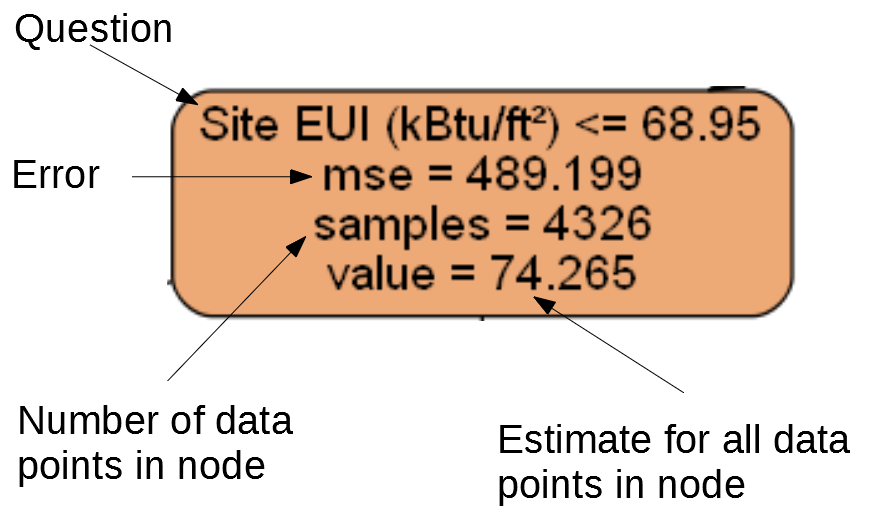

现在我们来看一下树，并尝试解释它的决定！

思考决策树的最佳方式是像流程图一样解释一系列 Yes/No 问题。我们从顶部开始，这里称为根，然后沿着树向下移动，行进方向由每个等式的答案确定。例如，

1. 我们在**根**这里提出的第一个问题是：`Site EUI`是否小于或等于15.95？

   * 如果答案是**肯定**的，那么我们**向左移动**并提出问题：`Weather Normalized Site Electricity Intensity`是否小于或等于3.85？

   * 如果答案是**否定**的，那么我们**向右移动**并提出问题：`Weather Normalized Site Electricity Intensity`是否小于或等于26.85？

2. 我们继续这个迭代过程，直到我们到达树的底部并最终进入叶节点。在这里，我们预测的值对应于节点中显示的值（此树中的值似乎是实际预测除以100）。

3. 每个节点有四个不同的信息：

    * Question： 是关于数据点的一个特征的价值：这决定了我们是从右边还是左边走出节点
    * mse： 是节点Error的度量
    * samples： 是节点中的示例（数据点）的数量

    * value; 是节点中所有sample的目标估计值

我们可以看到，随着我们增加树的深度，我们将能够更好地拟合数据。

* 对于小树，每个叶节点中将有许多示例，并且因为模型为节点中的每个示例估计相同的值，所以可能存在更大的错误（除非所有示例具有相同的目标值）。

* 构造太大的树虽然可能导致过度拟合。

* 我们可以控制许多超参数，这些参数决定了树的深度和每个叶子中的例子数量。当我们使用交叉验证执行优化时，我们看到了如何选择其中一些超参数。


虽然我们无法检查模型中的每一棵树，但查看谋个树确实可以让我们了解我们的模型如何进行预测。实际上，这种基于流程图的方法看起来很像人类做出决策，一次回答一个关于单个值的问题。基于决策树的集合简单地采用单个决策树的概念并组合许多个体的预测，以便创建具有比单个估计器更小的方差的模型。树木的集合往往非常准确，也很直观！

# 8.  得出结论&&记录发现

## 8.1 得出结论

机器学习管道的最后部分可能是最重要的：我们需要将我们学到的所有内容压缩成一个简短的摘要，仅突出最重要的发现。

就此项目而言，我们很简洁地总结了我们的工作。 但是，在我们呈现和相应地定制信息时，了解我们的受众非常重要。 这是一个用来申请工作的“作业”，考虑到这一点，这是我们需要在30秒内介绍的项目内容：

1. 使用纽约市的能源数据，可以建立一个模型，可以预测建筑物的能源之星得分，误差在10分以内。
2. `The Site EUI` and `Weather Normalized Electricity Intensity` 是预测能源之星得分的最相关特征。

如果有人要求提供详细信息，那么我们可以轻松地解释所有实施步骤，并展示我们（希望）有充分记录的工作。 机器学习项目的另一个重要方面是：
* 你已经注解了所有代码并使其易于跟进！ 
* 你希望别人（或者你自己在几个月内）能够看到你的工作并完全理解你做出的决定。 

理想情况下，你应该编写代码，以便再次使用它。 即使我们自己做项目，也可以练习正确的文档，当你想重新审视项目时，它会让你的生活更轻松。


## 记录发现

技术项目经常被忽视的部分是**文档和报告**。 我们可以在世界上做最好的分析，但如果我们没有清楚地传达我们发现的结果，那么它们就不会产生任何影响！当我们记录数据科学项目时，我们会采用所有版本的数据和代码并对其进行打包，以便我们的项目可以被其他数据科学家复制或构建。 重要的是要记住：

* **阅读代码的频率高于编写代码**
* **如果我们几个月后再回来的话，我们希望确保我们的工作对于其他人和我们自己都是可以理解的**,这意味着在代码中添加有用的注释并解释我们的推理。 

Jupyter notebook 是一个很好的文档工具，因为它们允许一个接一个地解释和编码。Jupyter notebook 也可以成为将结果传达给他人的良好平台。 使用笔记本扩展，我们可以隐藏最终报告中的代码，因为虽然很难相信，但**并不是每个人都希望在文档中看到一堆Python代码**！此外还可以直接下载为pdf或html，然后与他人共享。


完成Jupyter notebook后，原作者将其下载为`.tex`，在[texStudio](https://www.texstudio.org/)中进行了一些小改动，然后将其编译为pdf。最终版本看起来比默认的Jupyter Notebook pdf好一点，并且学习一些[latex](https://www.latex-project.org/)以创建更专业的报告是很有意义的！

**结语**：

现在是时候结束我们的这个项目了，如果你能从头看到尾，并且在自己的电脑上运行了所有代码，那不管是原作者还是我，都回会感到非常开心。希望现在你对如何处理机器学习项目有了一个宏观的了解。

这里面大部分内容是Will Koehrsen在申请工作时做的，我对其中的一些内容做了改进，例如
* **2.3 寻找关系**一节中的`查看所有的建筑物类型及其数量`等代码是我自己添加的，以便你对在此之前和在此之后的代码理解的更好；
* 还针对一些内容添加了详细的说明，例如"具有超过100个观测值的建筑类型" 这句话是什么意思。

如果你愿意，你可以先修改这个项目并尝试击败现有的模型！

最后是一些有用的学习资源：
1. [Hands-On Machine Learning with Scikit-Learn and Tensorflow](http://shop.oreilly.com/product/0636920052289.do)[中文笔记](https://github.com/DeqianBai/Hands-on-Machine-Learning)
2. [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)
3. [Kaggle: The Home of Data Science and Machine Learning](https://www.kaggle.com/)
4. [Datacamp: Good Beginner Tutorials for Practicing Coding with a Focus on Data Science](https://www.datacamp.com/)
5. [Dataquest: Hands on Lessons for Data Science Programming](https://www.dataquest.io/)